In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [62]:
data = pd.read_csv('/content/Indigenous _production1.csv', parse_dates = True)
data

,DATE,Indigenous Production
0,2008 \n1st quarter,20873.0
1,2008 \n2nd quarter,18548.0
2,2008 \n3rd quarter,14791.0
3,2008 \n4th quarter,19226.0
4,2009 \n1st quarter,18069.0
...,...,...
58,2022\n3rd quarter,9023.0
59,2022\n4th quarter,9748.0
60,2023\n1st quarter,9220.0
61,2023\n2nd quarter,8686.0


In [63]:
index_dates = pd.date_range(start='2008-01-01', periods=63, freq='QS')
index_dates

DATE =pd.DataFrame(index_dates, )
DATE.columns = ['Date']
DATE


,Date
0,2008-01-01
1,2008-04-01
2,2008-07-01
3,2008-10-01
4,2009-01-01
...,...
58,2022-07-01
59,2022-10-01
60,2023-01-01
61,2023-04-01


In [64]:
data = pd.concat([data, DATE], axis=1)
data

,DATE,Indigenous Production,Date
0,2008 \n1st quarter,20873.0,2008-01-01
1,2008 \n2nd quarter,18548.0,2008-04-01
2,2008 \n3rd quarter,14791.0,2008-07-01
3,2008 \n4th quarter,19226.0,2008-10-01
4,2009 \n1st quarter,18069.0,2009-01-01
...,...,...,...
58,2022\n3rd quarter,9023.0,2022-07-01
59,2022\n4th quarter,9748.0,2022-10-01
60,2023\n1st quarter,9220.0,2023-01-01
61,2023\n2nd quarter,8686.0,2023-04-01


In [65]:
data = data.drop('DATE', axis=1)

In [66]:
data = data.set_index('Date')


In [67]:
data

,Indigenous Production
Date,
2008-01-01,20873.0
2008-04-01,18548.0
2008-07-01,14791.0
2008-10-01,19226.0
2009-01-01,18069.0
...,...
2022-07-01,9023.0
2022-10-01,9748.0
2023-01-01,9220.0


<Axes: xlabel='Date'>

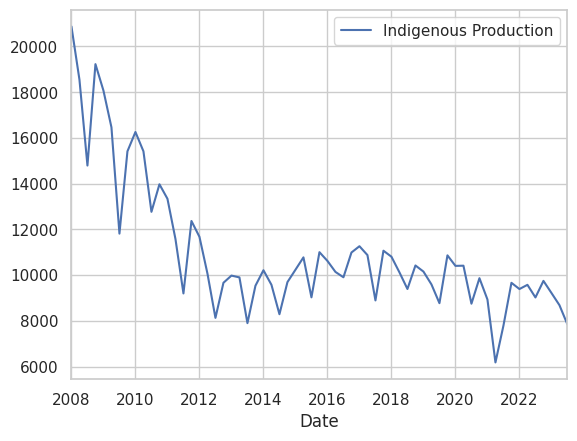

In [68]:
data.plot()

here we can see that indeginous productions reduced from the first quarter of 2008 till 2023.
in order to predict, the next 4 quarters of indigenous production in 2024 we will create a Times series model to FORECAST the future of the quarterly supply and demand data based on the indigenous production Factor.

1. data Splitting:
 we will split our data into training and testing, part of the data will be used to train the model and the other will be used test how well our model can forecast


In [69]:
#the length of the data
len(data)

63

In [70]:
#here 12 is 1year so we subtract a year from the data
x = len(data)-12

TRAIN DATA: to derive our training data we use a slicing technique from the begining of our data till x which we derived by subtracting the data length.

TEST DATE: to derive test data we slice our data from 51 till 62 which is equal to 12 remaining points

The training data must be larger than the text data so that there wont be error in the model


In [71]:
train_data = data[:51]

print('the length of the test_data is:', len(train_data))
train_data

the length of the test_data is: 51


,Indigenous Production
Date,
2008-01-01,20873.0
2008-04-01,18548.0
2008-07-01,14791.0
2008-10-01,19226.0
2009-01-01,18069.0
2009-04-01,16463.0
2009-07-01,11814.0
2009-10-01,15413.0
2010-01-01,16258.0


In [72]:
test_data = data[51:]

print('the length of the test_data is:', len(test_data))
test_data

the length of the test_data is: 12


,Indigenous Production
Date,
2020-10-01,9866.0
2021-01-01,8934.0
2021-04-01,6181.0
2021-07-01,7792.0
2021-10-01,9663.0
2022-01-01,9391.0
2022-04-01,9575.0
2022-07-01,9023.0
2022-10-01,9748.0


SCALING: after splitting our data we normalize our data using MInmax scaler:
we normalize the data so that observations in the data are within range.

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data)
scaled_train
print('this is our normalised training data:', scaled_train)

this is our normalised training data: [[1.        ]
 [0.82079544]
 [0.53121628]
 [0.8730538 ]
 [0.78387544]
 [0.66008941]
 [0.30175736]
 [0.57915832]
 [0.64428858]
 [0.57915832]
 [0.37521196]
 [0.46809003]
 [0.41930014]
 [0.28387544]
 [0.1002004 ]
 [0.34438107]
 [0.2911207 ]
 [0.16725759]
 [0.01780484]
 [0.13611839]
 [0.16032064]
 [0.15423154]
 [0.        ]
 [0.12617543]
 [0.17835671]
 [0.12933559]
 [0.0301372 ]
 [0.13835363]
 [0.17997534]
 [0.22175119]
 [0.08694312]
 [0.23924773]
 [0.20972715]
 [0.17273008]
 [0.15461693]
 [0.23809157]
 [0.25928781]
 [0.22945892]
 [0.07669185]
 [0.24418067]
 [0.22390936]
 [0.17118853]
 [0.11515338]
 [0.19438878]
 [0.17388623]
 [0.13064591]
 [0.0673655 ]
 [0.22853399]
 [0.19307846]
 [0.19369508]
 [0.06559272]]


In [75]:
scaled_test = scaler.transform(test_data)
print('this is our normalised training data:', scaled_test)

this is our normalised training data: [[ 0.15161091]
 [ 0.07977493]
 [-0.13241868]
 [-0.00824726]
 [ 0.13596424]
 [ 0.11499923]
 [ 0.12918144]
 [ 0.08663481]
 [ 0.1425158 ]
 [ 0.10181902]
 [ 0.06065978]
 [-0.0043934 ]]


we are going to use a Time Series Generator to preprocess our data into batches and timesteps in order to train on the model

In [76]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [77]:
batch = 1
length = 4

generator = TimeseriesGenerator(scaled_train, scaled_train, length=length,
                                batch_size=batch)

In [78]:
x,y = generator[0]

In [79]:
x #the generator is stored in x and y, x returns  the first four point of our data
   # because or chosen length is = 4 and our batch size = 1 , so it will return a 3by 3 array

array([[[1.        ],
        [0.82079544],
        [0.53121628],
        [0.8730538 ]]])

In [80]:
y # y return the next observation or point in our data

array([[0.78387544]])

In [81]:
scaled_train # you can see from our scaled train x return the first four . y returned the
#next value
#because the goal is to predict the next value or forecast it

array([[1.        ],
       [0.82079544],
       [0.53121628],
       [0.8730538 ],
       [0.78387544],
       [0.66008941],
       [0.30175736],
       [0.57915832],
       [0.64428858],
       [0.57915832],
       [0.37521196],
       [0.46809003],
       [0.41930014],
       [0.28387544],
       [0.1002004 ],
       [0.34438107],
       [0.2911207 ],
       [0.16725759],
       [0.01780484],
       [0.13611839],
       [0.16032064],
       [0.15423154],
       [0.        ],
       [0.12617543],
       [0.17835671],
       [0.12933559],
       [0.0301372 ],
       [0.13835363],
       [0.17997534],
       [0.22175119],
       [0.08694312],
       [0.23924773],
       [0.20972715],
       [0.17273008],
       [0.15461693],
       [0.23809157],
       [0.25928781],
       [0.22945892],
       [0.07669185],
       [0.24418067],
       [0.22390936],
       [0.17118853],
       [0.11515338],
       [0.19438878],
       [0.17388623],
       [0.13064591],
       [0.0673655 ],
       [0.228

MODEL : to build our model we will import some tensorflow libraries and use the RECURRENT NEURAL NETWORK AS OUR MODEL TO FORCAST because it is used to model for Timeseries Data

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [83]:
n_features = 1

In [84]:
model = Sequential()
model.add(LSTM(11, activation='relu', input_shape = (length, n_features)))
# model.add(LSTM(2, activation='relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [85]:
model.summary() #returns a summary of the model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 11)                572       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 584 (2.28 KB)
Trainable params: 584 (2.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
!pip install visualkeras
import visualkeras

# Generate the layered view
visualkeras.layered_view(model,legend=True, scale_xy=1, scale_z=2.5).show()
visualkeras.layered_view(model, to_file='indigenous_production_model.png')

In [87]:
early_stop = EarlyStopping(monitor= 'val_loss', patience= 2)

In [88]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size= batch )

In [89]:
model.fit_generator(generator, epochs = 10, callbacks=[early_stop],
          validation_data=validation_generator)

Epoch 1/10


<ipython-input-89-3d5a3ad7ea28>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 10, callbacks=[early_stop],


47/47 [==============================] - 2s 10ms/step - loss: 0.0473 - val_loss: 0.0036
Epoch 2/10
47/47 [==============================] - 0s 6ms/step - loss: 0.0210 - val_loss: 0.0107
Epoch 3/10
47/47 [==============================] - 0s 7ms/step - loss: 0.0169 - val_loss: 0.0113


In [90]:
error = pd.DataFrame(model.history.history)
error

,loss,val_loss
0,0.047283,0.003637
1,0.021029,0.010715
2,0.016859,0.011325


<Axes: >

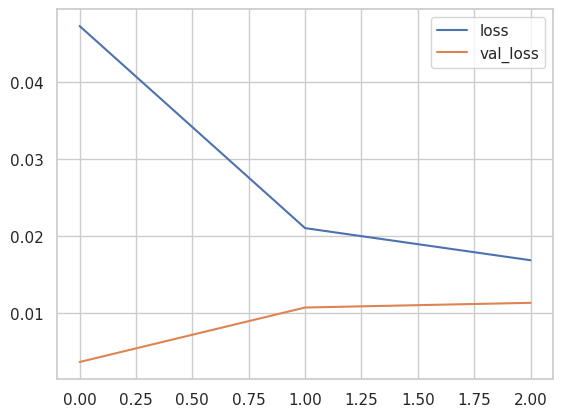

In [91]:
error.plot()

from the plot above , the error is gragually minimised as it drops down the hill approaching 0

model created using Recurrent Neural Network(RNN).
next is to use the model to predict the next point of the data

In [92]:

predict_test = []

first_batch_eval = scaled_train[-length:]
current_bacth_eval = first_batch_eval.reshape((1,length, n_features))
for i in range(len(test_data)): #forecast 25 points in the fututre
  # Use the model to predict the next value based on the current_batch_eval


    new_pred = model.predict(current_bacth_eval)[0]

  # At each iteration, 'current_batch_eval' is updated by excluding the first element
    # and including the newly predicted value
    predict_test.append(new_pred)
    current_bacth_eval = np.append(current_bacth_eval[:,1:,:], [[new_pred]], axis=1)

1/1 [==============================] - 0s 32ms/step


In [93]:
predict_test

[array([0.21629258], dtype=float32),
 array([0.22065645], dtype=float32),
 array([0.22626407], dtype=float32),
 array([0.23048344], dtype=float32),
 array([0.24306265], dtype=float32),
 array([0.24508269], dtype=float32),
 array([0.24697857], dtype=float32),
 array([0.24860184], dtype=float32),
 array([0.25002775], dtype=float32),
 array([0.2505697], dtype=float32),
 array([0.25100031], dtype=float32),
 array([0.25131616], dtype=float32)]

In [94]:
predict_test = scaler.inverse_transform(predict_test)
#we use inverse transform to transform our data back to its original form

In [95]:
predict_test

array([[10705.17986807],
       [10761.7968415 ],
       [10834.55010185],
       [10889.29218358],
       [11052.49475878],
       [11078.70283708],
       [11103.29991594],
       [11124.36025849],
       [11142.85997611],
       [11149.8913033 ],
       [11155.47808617],
       [11159.57585937]])

In [96]:
test_data['predictions']= predict_test

<ipython-input-96-5dee099eb8e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predictions']= predict_test


In [97]:
test_data

,Indigenous Production,predictions
Date,,
2020-10-01,9866.0,10705.179868
2021-01-01,8934.0,10761.796842
2021-04-01,6181.0,10834.550102
2021-07-01,7792.0,10889.292184
2021-10-01,9663.0,11052.494759
2022-01-01,9391.0,11078.702837
2022-04-01,9575.0,11103.299916
2022-07-01,9023.0,11124.360258
2022-10-01,9748.0,11142.859976


<Axes: xlabel='Date'>

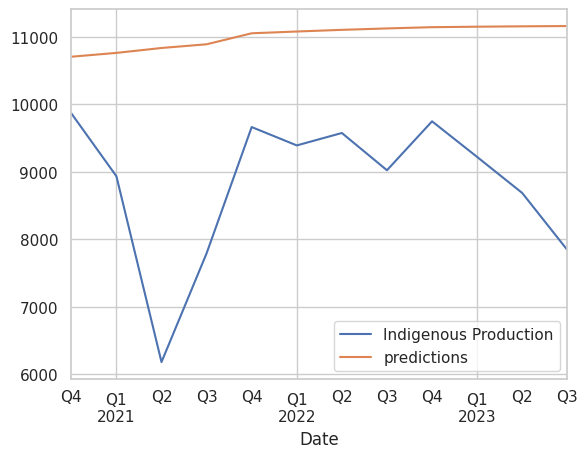

In [98]:
test_data.plot()

FORECAST : IN ORDER TO FORECAST THE NEXT QUARTELY OBSERVATIONS , WE WILL RETRAIN ON ALL THE DATA AGAIN

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(data)

In [100]:
length = 5
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length=length, batch_size=1)

In [101]:
model = Sequential()
model.add(LSTM(15, activation='relu', input_shape = (length, n_features)))
# model.add(LSTM(2, activation='relu', input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse')
model.fit_generator(generator, epochs = 8)


Epoch 1/8


<ipython-input-101-9e1e4c0e8d4d>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 8)


58/58 [==============================] - 3s 8ms/step - loss: 0.0510
Epoch 2/8
58/58 [==============================] - 1s 8ms/step - loss: 0.0143
Epoch 3/8
58/58 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 4/8
58/58 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 5/8
58/58 [==============================] - 0s 6ms/step - loss: 0.0088
Epoch 6/8
58/58 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 7/8
58/58 [==============================] - 0s 7ms/step - loss: 0.0076
Epoch 8/8
58/58 [==============================] - 0s 7ms/step - loss: 0.0067


In [102]:
loss = pd.DataFrame(model.history.history)
loss

,loss
0,0.051009
1,0.014308
2,0.010122
3,0.009342
4,0.008830
5,0.008271
6,0.007594
7,0.006685


<Axes: >

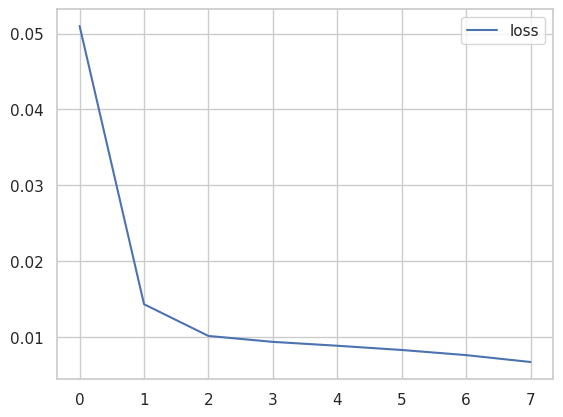

In [103]:
loss.plot()

In [104]:
forecast = []
#replace period with whatever forecast length you want
periods = 13
first_batch_eval = scaled_train[-length:]
current_bacth_eval = first_batch_eval.reshape((1,length, n_features))
for i in range(periods): #forecast 25 points in the fututre
  # Use the model to predict the next value based on the current_batch_eval
    new_pred = model.predict(current_bacth_eval)[0]

  # At each iteration, 'current_batch_eval' is updated by excluding the first element
    # and including the newly predicted value
    forecast.append(new_pred)
    current_bacth_eval = np.append(current_bacth_eval[:,1:,:], [[new_pred]], axis=1)


1/1 [==============================] - 0s 33ms/step


In [105]:
forecast = scaler.inverse_transform(forecast)
#we use inverse transform to transform our data back to its original for

In [106]:
data

,Indigenous Production
Date,
2008-01-01,20873.0
2008-04-01,18548.0
2008-07-01,14791.0
2008-10-01,19226.0
2009-01-01,18069.0
...,...
2022-07-01,9023.0
2022-10-01,9748.0
2023-01-01,9220.0


In [107]:
forecast

array([[10141.40140367],
       [10255.48019242],
       [10247.32137829],
       [10252.7260465 ],
       [10255.21920007],
       [10337.05557412],
       [10354.20335138],
       [10363.65514094],
       [10373.840029  ],
       [10383.72023267],
       [10393.35065699],
       [10398.10381097],
       [10401.78283644]])

In [108]:
forecast_index = forecast_index = pd.date_range(start='2023-10-01', periods=periods, freq='QS')

In [109]:
forecast_index

DatetimeIndex(['2023-10-01', '2024-01-01', '2024-04-01', '2024-07-01',
               '2024-10-01', '2025-01-01', '2025-04-01', '2025-07-01',
               '2025-10-01', '2026-01-01', '2026-04-01', '2026-07-01',
               '2026-10-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [110]:
forecast

array([[10141.40140367],
       [10255.48019242],
       [10247.32137829],
       [10252.7260465 ],
       [10255.21920007],
       [10337.05557412],
       [10354.20335138],
       [10363.65514094],
       [10373.840029  ],
       [10383.72023267],
       [10393.35065699],
       [10398.10381097],
       [10401.78283644]])

In [111]:
new_forecast = pd.DataFrame(data= forecast, index= forecast_index, columns =['forecast'])

In [112]:
new_forecast

,forecast
2023-10-01,10141.401404
2024-01-01,10255.480192
2024-04-01,10247.321378
2024-07-01,10252.726047
2024-10-01,10255.219200
2025-01-01,10337.055574
2025-04-01,10354.203351
2025-07-01,10363.655141
2025-10-01,10373.840029
2026-01-01,10383.720233


In [113]:
# ax = data.plot()
# new_forecast.plot(ax=ax)
# plt.xlim('2015-10-01', '2024-10-01')

here the model shows that in 2024 INDIGENOUS PRODUCTION  will increase in QUARTERLY Supply and Demand of Gas

In [114]:
import seaborn as sns

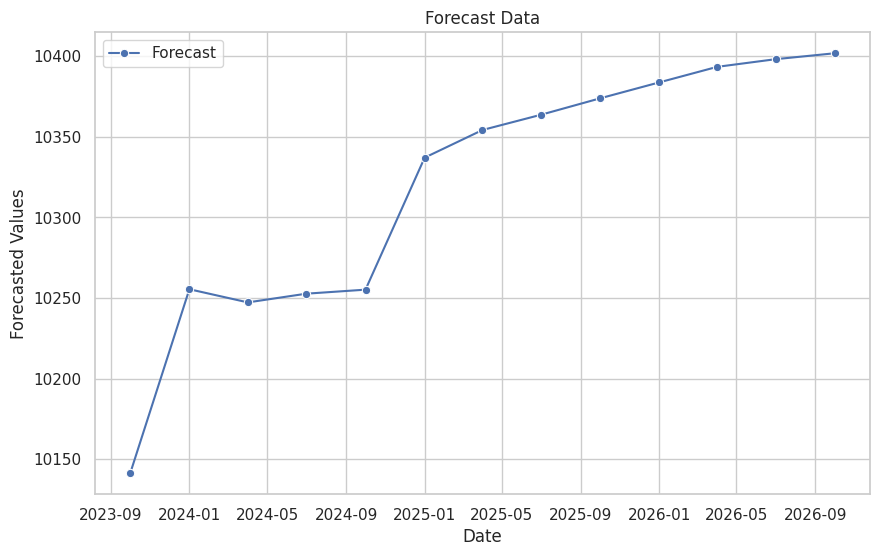

In [115]:
sns.set(style="whitegrid")

# Plotting the forecast data using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=new_forecast.index, y='forecast', data=new_forecast, marker='o', label='Forecast')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Forecasted Values')
plt.title('Forecast Data')

# Display legend
plt.legend()

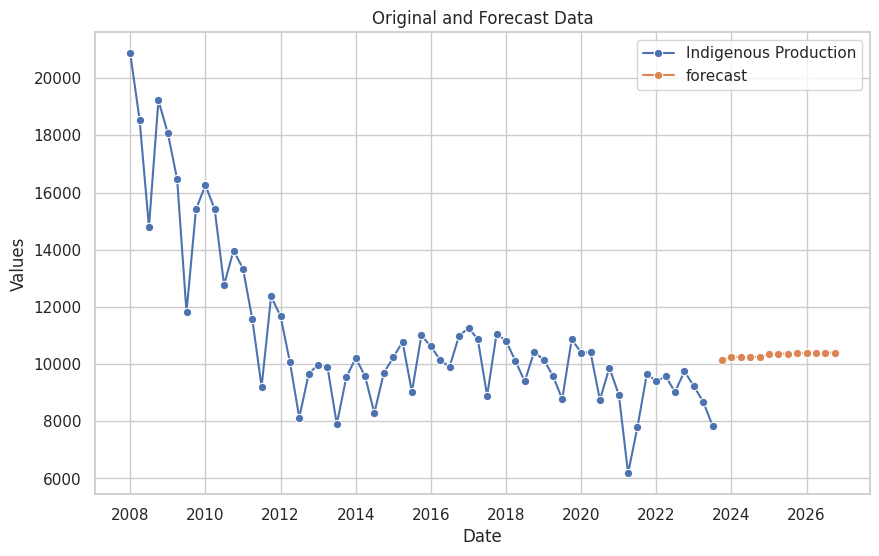

In [116]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y='Indigenous Production', data=data, marker='o', label='Indigenous Production')
sns.lineplot(x=new_forecast.index, y='forecast', data=new_forecast, marker='o', label='forecast')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Original and Forecast Data')

# Display legend
plt.legend()

# Show the plot
plt.show()